In [0]:
!rm jamesbond.txt
!rm starwars.txt

!wget https://gist.githubusercontent.com/Paul-Michaud/efc51212e7119218134875c4027fb2d9/raw/6717bee0d587ed49f7ac3a37ecbb039e2bf06a1d/jamesbond.txt
!wget https://gist.githubusercontent.com/Paul-Michaud/d115f2e18b23dbc492e7743c1ea8d28e/raw/2a24c8612f8755dff7572bb83807c3ed35079678/starwars.txt

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import nltk.stem


class StemmedTfidfVectorizer(TfidfVectorizer): # hérite de TfidVectorizer
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (stemmer.stem(w) for w in analyzer(doc))

      
synopses_jamesbond = open('jamesbond.txt').read().split('\nNEXT')
synopse_starwars = open('starwars.txt').read().split('\nNEXT')

synopses_jamesbond_clean = []
for text in synopses_jamesbond:
    text = BeautifulSoup(text, 'html.parser').getText()
    #strips html formatting and converts to unicode
    synopses_jamesbond_clean.append(text)
    
synopses_starwars_clean = []
for text in synopse_starwars:
    text = BeautifulSoup(text, 'html.parser').getText()
    #strips html formatting and converts to unicode
    synopses_starwars_clean.append(text)
    

synopses = synopses_starwars_clean + synopses_jamesbond_clean
stemmer=nltk.stem.SnowballStemmer('english')

vectorizer = StemmedTfidfVectorizer(max_df=0.8, min_df=0.2,stop_words='english')
X = vectorizer.fit_transform(synopses)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
cluster_names=[]
for i in range(true_k):
    print("Cluster %d:" % i),
    names=[]
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind]),
        names.append(terms[ind])
    else:
        print
    cluster_names.append(names)
    

print("\n")
print("Prediction")
 
Y = vectorizer.transform(["""About 30 years after the destruction of the Death 
                          Star II, Luke Skywalker has vanished following the 
                          demise of the new Jedi Order he was attempting to 
                          build."""])
                          
prediction = model.predict(Y)
print(prediction)
 
Y = vectorizer.transform(["""After an operation in Istanbul ends in disaster, 
                          Bond is missing and presumed to be dead. In the 
                          aftermath, questions are raised over M's ability to 
                          run the Secret Service, and she becomes the subject 
                          of a government review over her handling of the 
                          situation."""])

prediction = model.predict(Y)
print(prediction)





rm: cannot remove 'jamesbond.txt': No such file or directory
rm: cannot remove 'starwars.txt': No such file or directory
--2017-11-29 23:02:11--  https://gist.githubusercontent.com/Paul-Michaud/efc51212e7119218134875c4027fb2d9/raw/6717bee0d587ed49f7ac3a37ecbb039e2bf06a1d/jamesbond.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3397 (3.3K) [text/plain]
Saving to: ‘jamesbond.txt’

jamesbond.txt       100%[===================>]   3.32K  --.-KB/s    in 0s      

2017-11-29 23:02:11 (91.1 MB/s) - ‘jamesbond.txt’ saved [3397/3397]

--2017-11-29 23:02:12--  https://gist.githubusercontent.com/Paul-Michaud/d115f2e18b23dbc492e7743c1ea8d28e/raw/2a24c8612f8755dff7572bb83807c3ed35079678/starwars.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)...

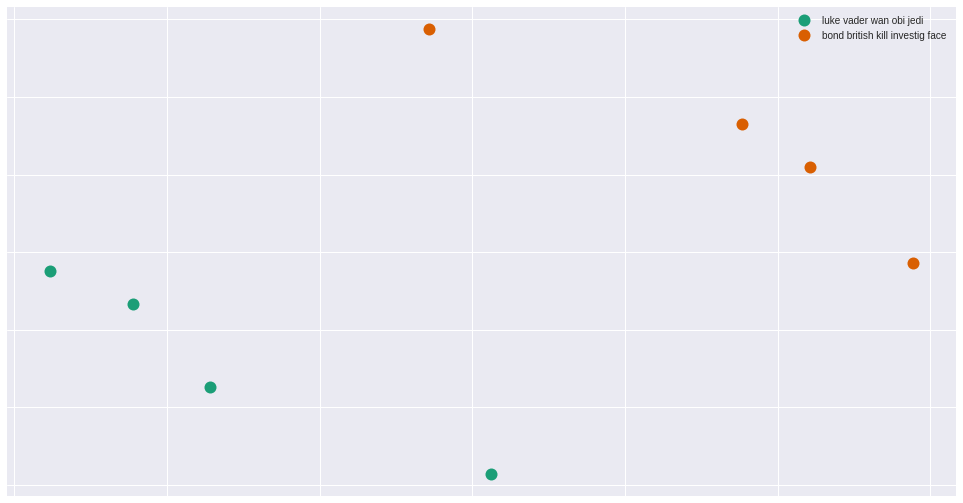

In [0]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

import os  # for os.path.basename
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS


dist = 1 - cosine_similarity(X)

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]


#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02'}

#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

clusters = model.labels_.tolist()
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=' '.join(cluster_names[name]), color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], "", size=8)  
